<a href="https://colab.research.google.com/github/ryannovianno9/Clustering-Penguins-Species/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Overview

Dataset link: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

The dataset consists of 5 columns

culmen_length_mm: culmen length (mm)

culmen_depth_mm: culmen depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g: body mass (g)

sex: penguin sex

#2. IMPORT LIBRARIES

In [1]:
!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

#3. DATA LOADING

In [3]:
ori_df = pd.read_csv('/content/drive/MyDrive/penguins.csv')
df = ori_df.copy()
df.shape

(344, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [5]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


#4. DATA CLEANING

In [6]:
dict(df.dtypes)

{'culmen_length_mm': dtype('float64'),
 'culmen_depth_mm': dtype('float64'),
 'flipper_length_mm': dtype('float64'),
 'body_mass_g': dtype('float64'),
 'sex': dtype('O')}

###4.1 MISSING VALUE

In [7]:
df.isna()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,False,False,False,False
...,...,...,...,...,...
339,True,True,True,True,True
340,False,False,False,False,False
341,False,False,False,False,False
342,False,False,False,False,False


In [8]:
df.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


<Axes: >

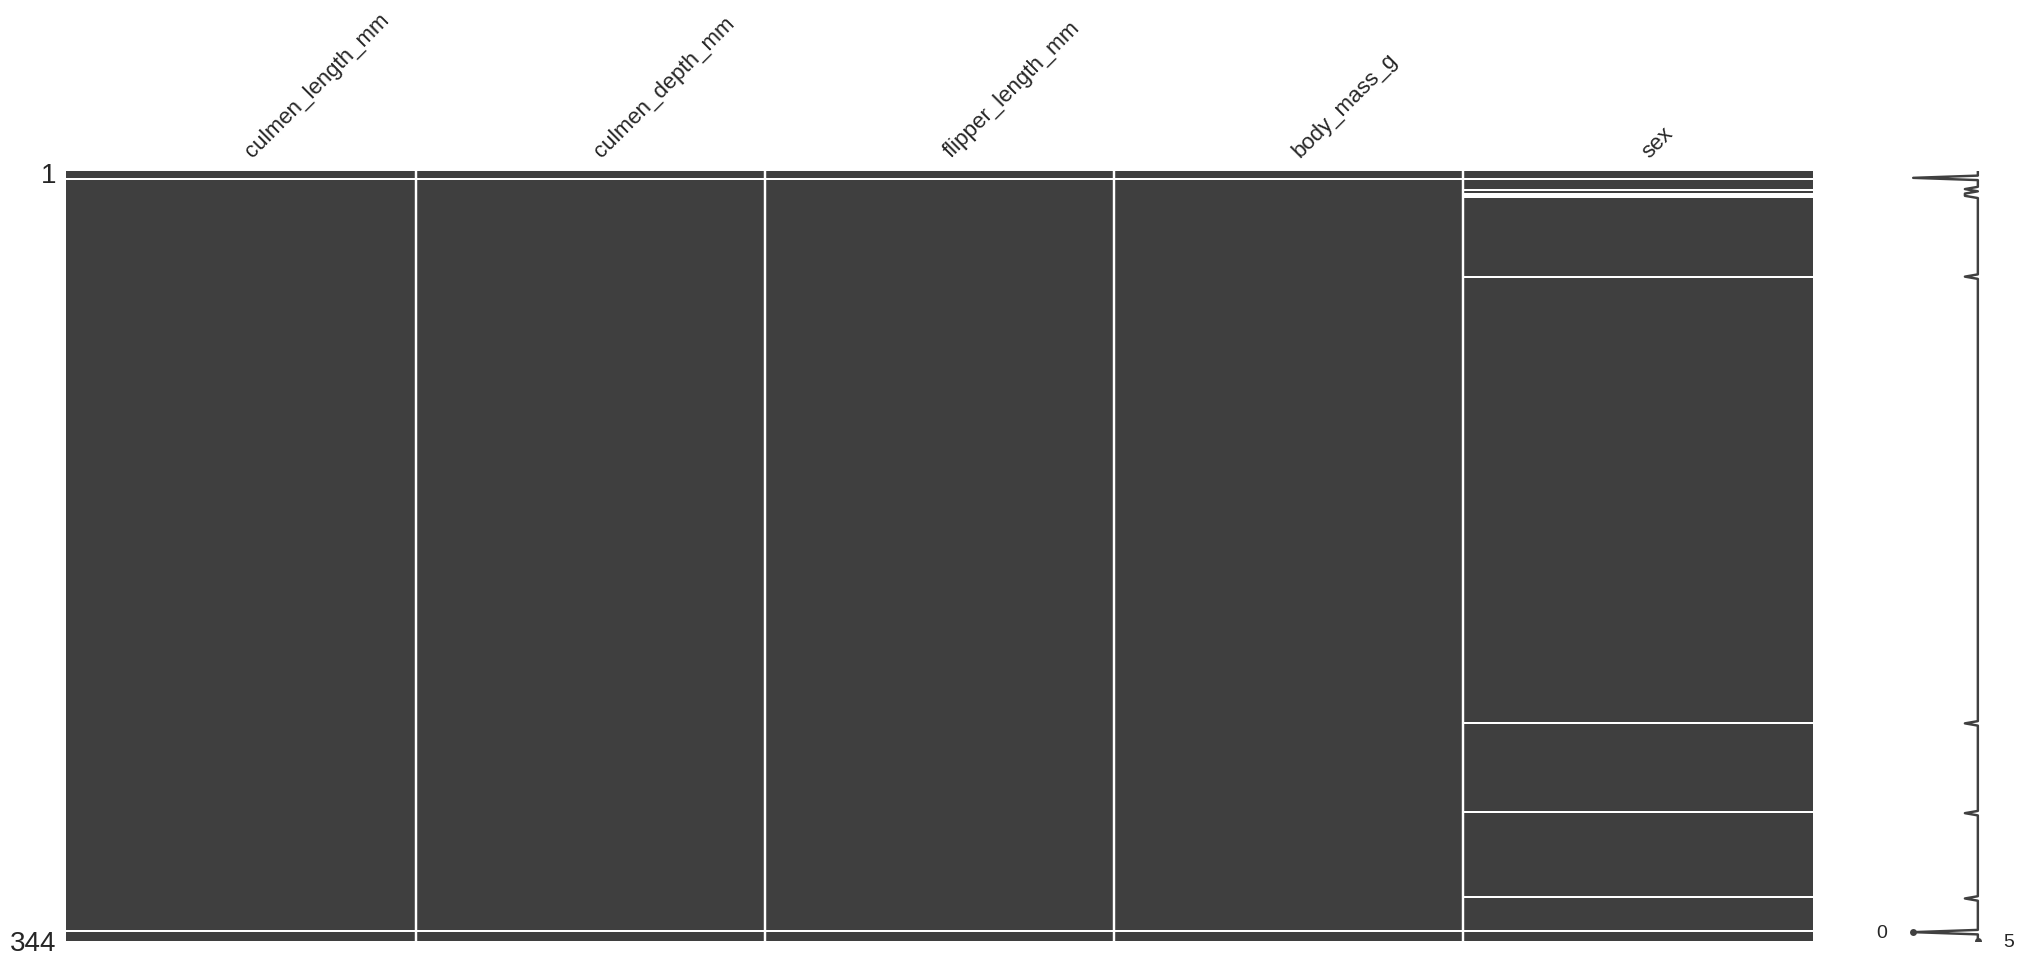

In [10]:
import missingno as msno

msno.matrix(df)

In [11]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

,0
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.616279


The percentage of missing values is not more than 30%, meaning that the data can be imputed.

In [12]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

print(num_cols)
print(cat_cols)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')
Index(['sex'], dtype='object')


In [13]:
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

/tmp/ipython-input-13-756497708.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-13-756497708.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [14]:
df.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [15]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [16]:
df['sex'] = df['sex'].replace('.', np.nan)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['sex'].unique()

/tmp/ipython-input-16-3420971579.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace=True)


array(['MALE', 'FEMALE'], dtype=object)

In [17]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

###4.2 Checking Duplicate Data

In [18]:
df[df.duplicated()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,43.92193,17.15117,214.01462,4201.754386,MALE


In [19]:
df.drop_duplicates(inplace=True)

#5. EDA

##5.1 Statistical Analysis

In [20]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,343.000000,343.000000,343.000000,343.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.451596,1.971904,260.176846,800.781229
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.250000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,214.000000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


* There are 343 penguins in total
* The "culmen_length_mm", "culmen_depth_mm", and "body_mass_g" columns have a standard deviation lower than the mean which indicates that all these columns are clustered near the mean, some of these parameters help us find the mean.
* There is a very distant outlier in the column flipper_length_mm


##5.2 Data Visualization

culmen_length_mm
Skew : 0.05


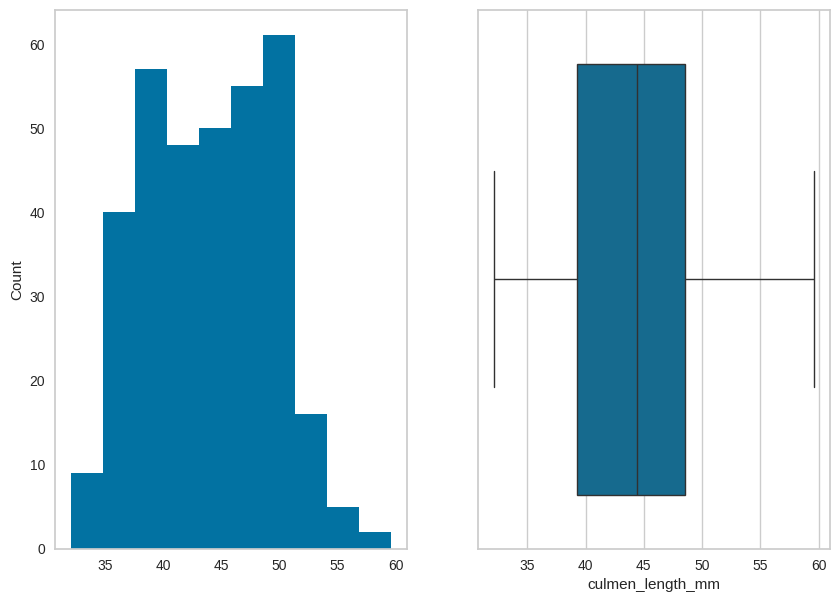

culmen_depth_mm
Skew : -0.14


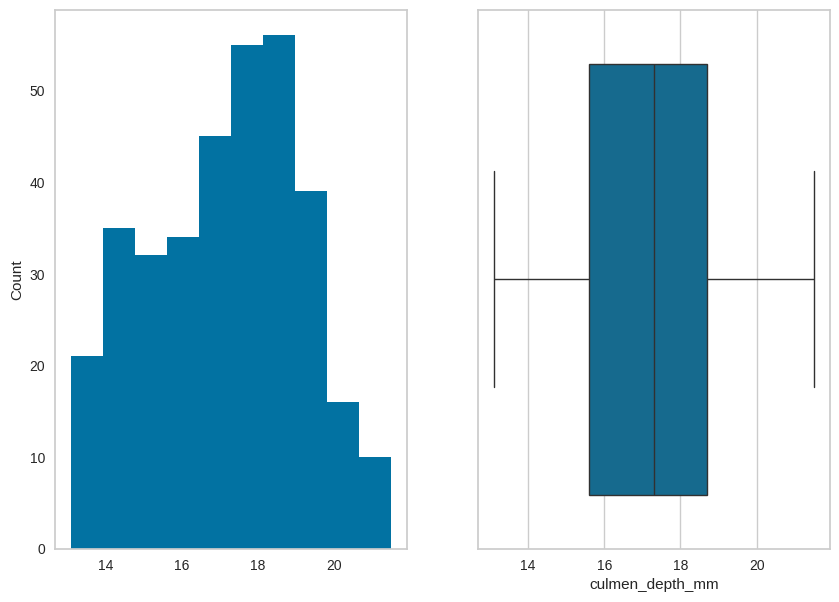

flipper_length_mm
Skew : 18.3


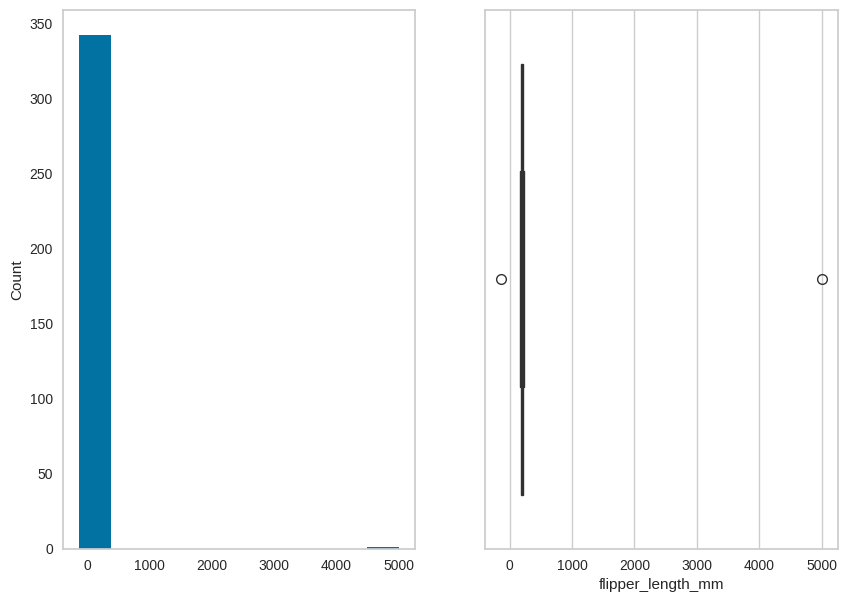

body_mass_g
Skew : 0.47


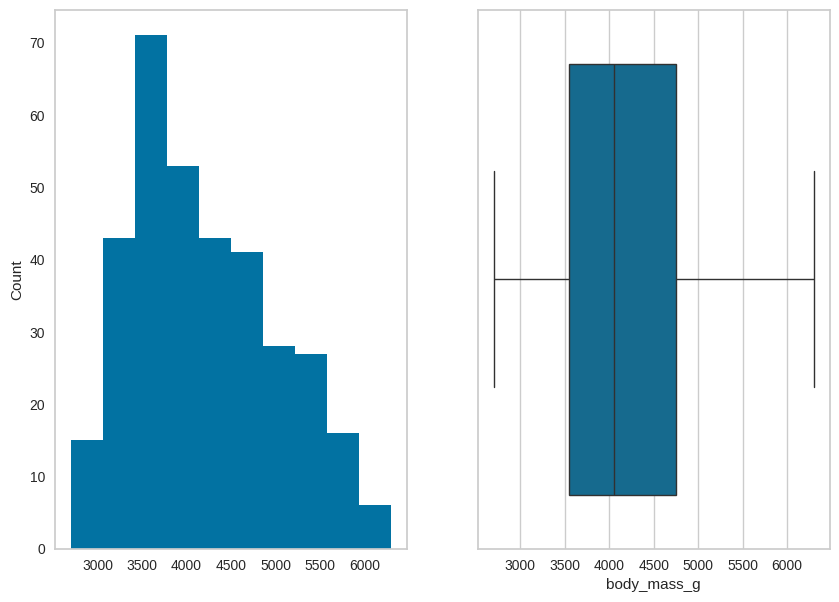

In [21]:
# Taking all columns expect the country name. (it does not make sense, Does it?)
for col in num_cols:
    print(col)
    print("Skew :", round(df[col].skew(), 2))
    plt.figure(figsize=(10, 7))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel("Count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

* Most of the data is skewed
* "flipper_length_mm" has one very large outlier on the right side

##5.3 Checking Correlation

In [22]:
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.00000,3750.000000,1
1,39.50000,17.40000,186.00000,3800.000000,0
2,40.30000,18.00000,195.00000,3250.000000,0
3,43.92193,17.15117,214.01462,4201.754386,1
4,36.70000,19.30000,193.00000,3450.000000,0


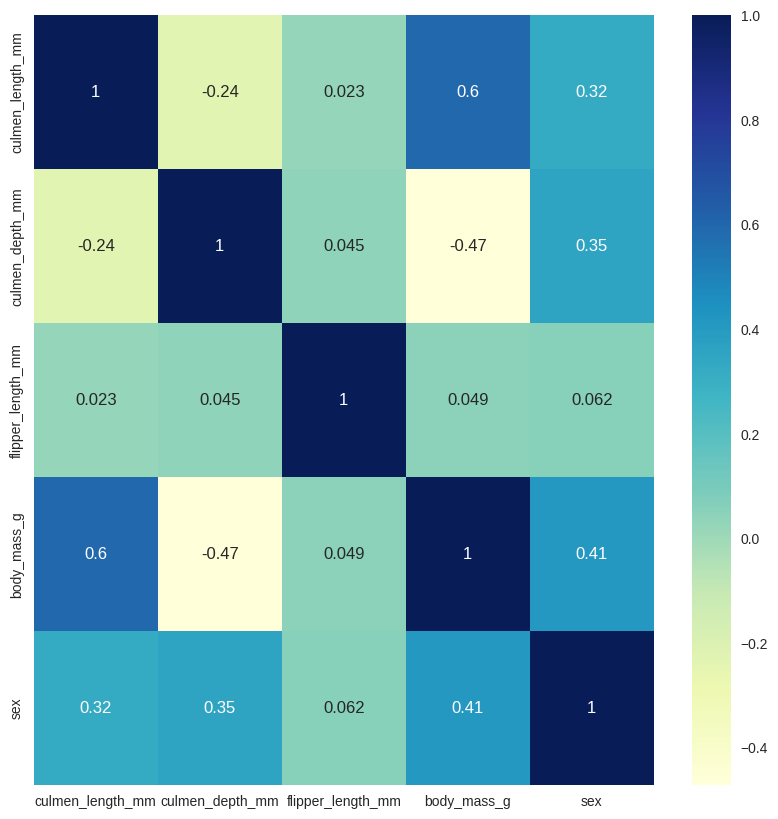

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

#6. PREPROCESSING DATA

###6.1 SCALING

In [24]:
df2 = df.copy()

In [25]:
#Scaling
scaler = StandardScaler()
df2 = scaler.fit_transform(df2)
df2

array([[-0.88579092,  0.78659671, -0.12707838, -0.56496624,  0.96279089],
       [-0.81231072,  0.12637225, -0.10783261, -0.502436  , -1.03864714],
       [-0.66535032,  0.43109123, -0.07319021, -1.19026869, -1.03864714],
       ...,
       [ 1.19002474, -0.7369982 ,  0.03073696,  1.93624354,  0.96279089],
       [ 0.23478213, -1.19407667, -0.00775458,  1.24841085, -1.03864714],
       [ 1.09817449, -0.53385221, -0.00390543,  1.49853182,  0.96279089]])

###6.3 DIMENSIONALLY REDUCTION

In [26]:
#Initiating PCA to reduce dimentions aka features to 2
pca = PCA(n_components=2)
pca.fit(df2)
PCA_ds = pd.DataFrame(pca.transform(df2), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,343.0,-1.657243e-16,1.412257,-2.602119,-1.126072,-0.079708,0.905375,3.562280
col2,343.0,-4.143106e-17,1.174398,-2.231815,-0.755668,-0.122527,1.087522,5.222853


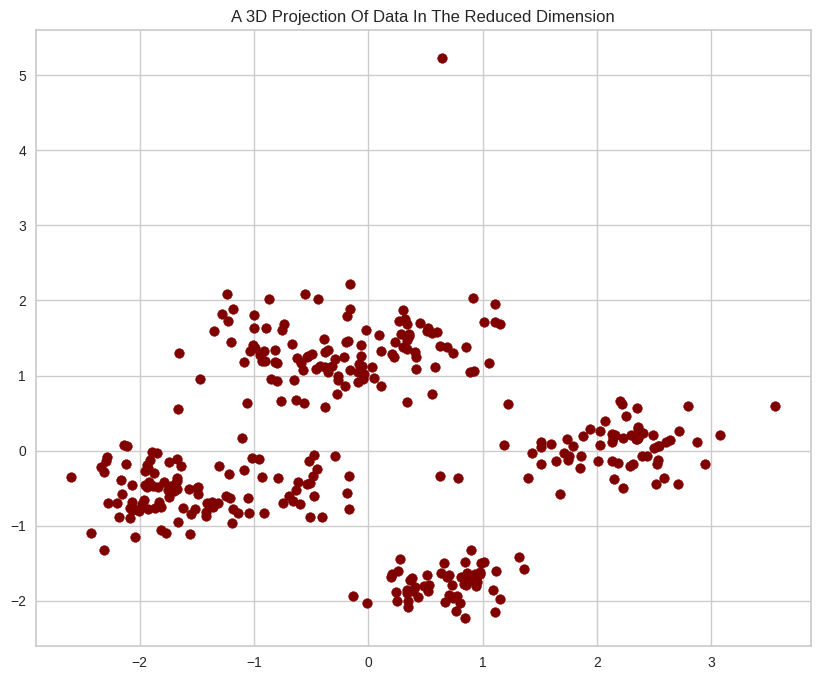

In [27]:
#A 2D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [28]:
PCA_ds

,col1,col2
0,-0.814070,1.178457
1,-1.213166,-0.635024
2,-1.673746,-0.361836
3,0.335707,0.648202
4,-2.111738,0.059946
...,...,...
338,1.149666,-1.974322
339,0.946811,-1.754517
340,2.539245,0.062030
341,0.978057,-1.617301


#7. Determining the number of clusters

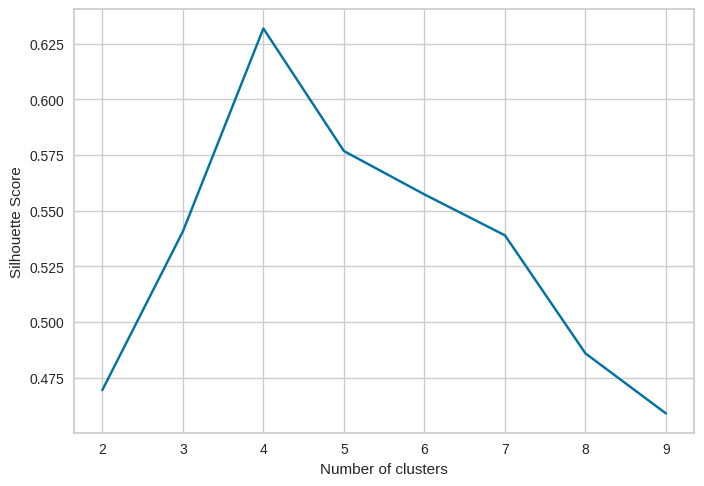

In [29]:
# Silhoutte score dict
sc = {}

# iterating over a range of ks fitting it to k-means and getting the silhoute score for each.
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(PCA_ds)
    labels = kmeans.predict(PCA_ds)
    sc[k] = silhouette_score(PCA_ds, labels)

# Lets plot the finding - Maybe we will find an elbow
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [30]:
sc

{2: np.float64(0.4695069396910901),
 3: np.float64(0.5407021948103992),
 4: np.float64(0.6318837650760851),
 5: np.float64(0.5768536316573398),
 6: np.float64(0.5573703092170028),
 7: np.float64(0.5389962284190816),
 8: np.float64(0.4859724358825667),
 9: np.float64(0.45899964934971527)}

Highest silhouette score at k = 4

#8. BUILDING MODEL

###8.1 K-MEANS CLUSTERING

In [31]:
#Initiating the Agglomerative Clustering model
kmeans_model = KMeans(4)
# fit model and predict clusters
predictions = kmeans_model.fit_predict(PCA_ds)
PCA_ds["Clusters"] = predictions
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= predictions

In [32]:
df['Clusters']

,Clusters
0,2
1,0
2,0
3,2
4,0
...,...
338,3
340,3
341,1
342,3


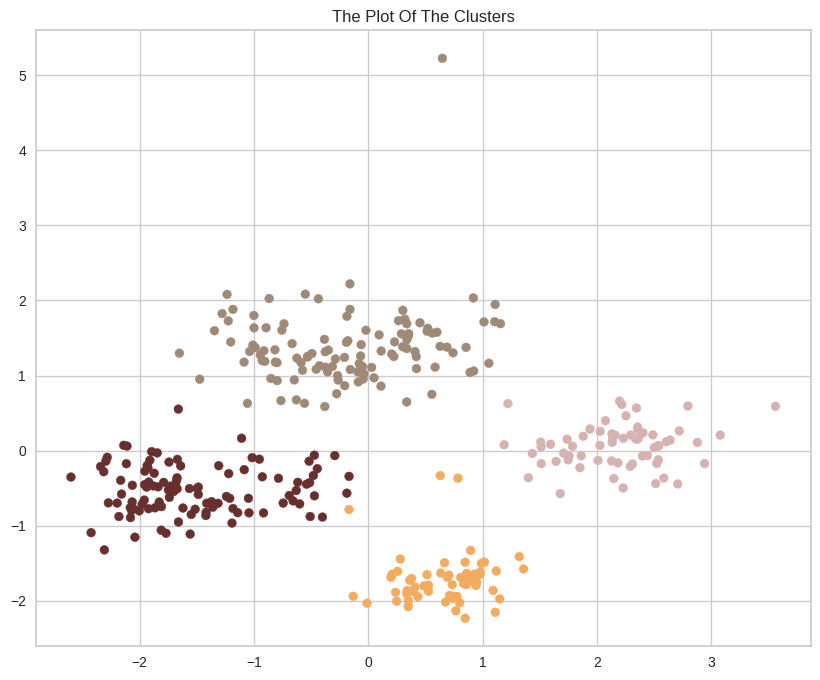

In [33]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

#9. Result Explanation

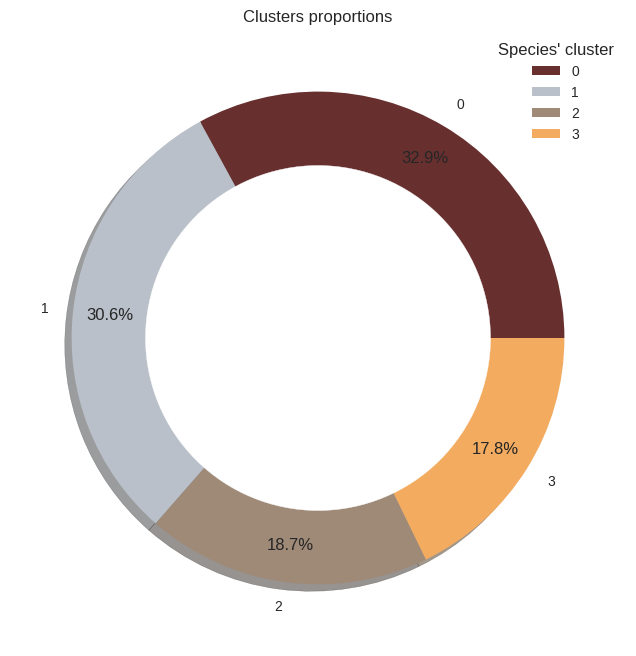

In [34]:
pal = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"]
sizes = dict(df['Clusters'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors = pal)
plt.legend(title="Species' cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [35]:
df['Clusters'].value_counts()

,count
Clusters,
2,113
0,105
1,64
3,61


In [36]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Clusters
0,39.10000,18.70000,181.00000,3750.000000,1,2
1,39.50000,17.40000,186.00000,3800.000000,0,0
2,40.30000,18.00000,195.00000,3250.000000,0,0
3,43.92193,17.15117,214.01462,4201.754386,1,2
4,36.70000,19.30000,193.00000,3450.000000,0,0


/tmp/ipython-input-40-3240848550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["culmen_length_mm"],x=df["Clusters"], palette= pal)


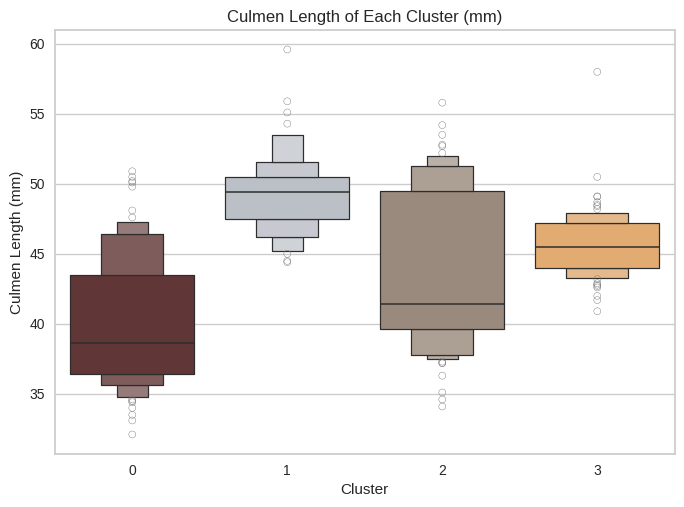

In [40]:
#Plotting the number of income
plt.figure()
pl=sns.boxenplot(y=df["culmen_length_mm"],x=df["Clusters"], palette= pal)
plt.xlabel("Cluster")
plt.ylabel("Culmen Length (mm)")
pl.set_title("Culmen Length of Each Cluster (mm)")
plt.show()

* Group 0: Most penguins have short - medium culmens
* Group 1: Most penguins have long culmens
* Group 2: Most penguins have medium culmens with some long and some short.
* Group 3: most penguins have medium culmens.

/tmp/ipython-input-42-3504062002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["culmen_depth_mm"],x=df["Clusters"], palette= pal)


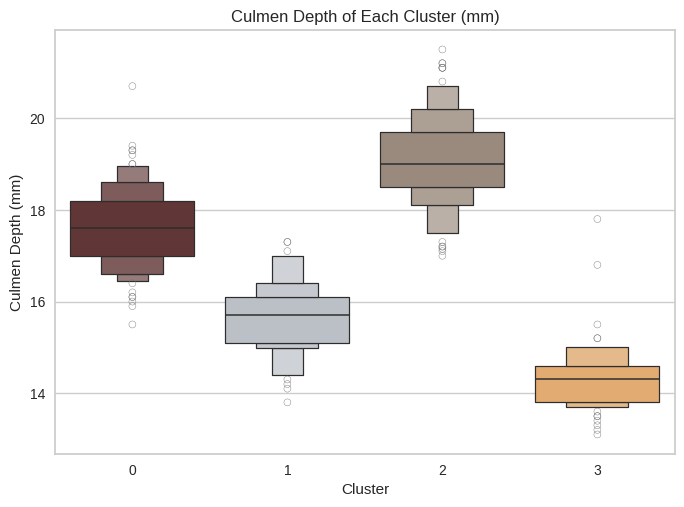

In [42]:
#Plotting the number of exports
plt.figure()
pl=sns.boxenplot(y=df["culmen_depth_mm"],x=df["Clusters"], palette= pal)
plt.xlabel("Cluster")
plt.ylabel("Culmen Depth (mm)")
pl.set_title("Culmen Depth of Each Cluster (mm)")
plt.show()

* Group 0: Moderately wide culmen width
* Group 1: Medium culmen width
* Group 2: Long culmen width
* Group 3: Short culmen width

/tmp/ipython-input-43-1850582903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["flipper_length_mm"],x=df["Clusters"], palette= pal)


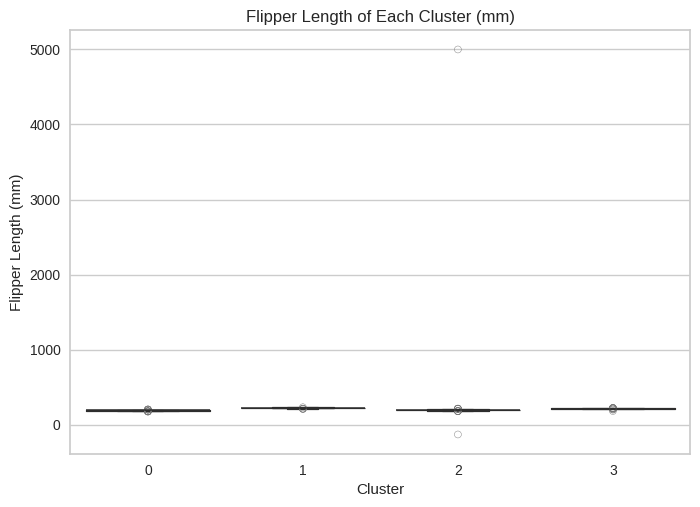

In [43]:
#Plotting the number of child mortality
plt.figure()
pl=sns.boxenplot(y=df["flipper_length_mm"],x=df["Clusters"], palette= pal)
plt.xlabel("Cluster")
plt.ylabel("Flipper Length (mm)")
pl.set_title("Flipper Length of Each Cluster (mm)")
plt.show()

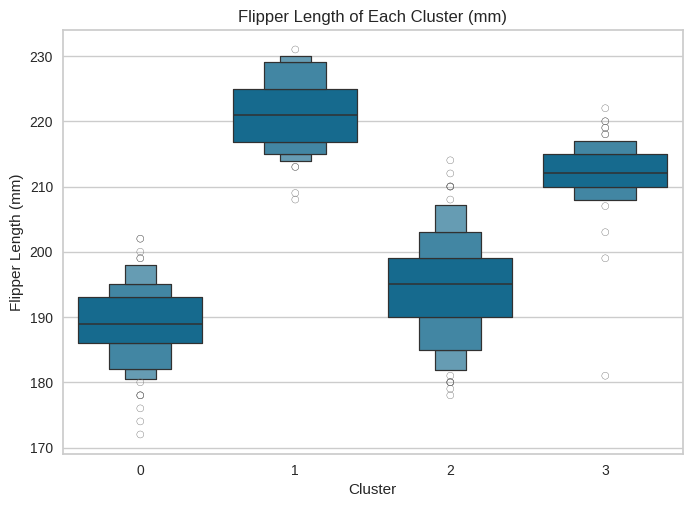

In [44]:
Q1 = df['flipper_length_mm'].quantile(0.25)
Q3 = df['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data tanpa outlier
flipper_length_mm2 = df[(df['flipper_length_mm'] >= lower_bound) & (df['flipper_length_mm'] <= upper_bound)]

# Visualisasi ulang tanpa outlier
sns.boxenplot(data=flipper_length_mm2, x="Clusters", y="flipper_length_mm")
plt.xlabel("Cluster")
plt.ylabel("Flipper Length (mm)")
plt.title("Flipper Length of Each Cluster (mm)")
plt.show()

* Group 0: Short - Medium Flippers
* Group 1: Long flipper
* Group 2: Medium - Long Flipper
* Group 3: Long flipper

/tmp/ipython-input-45-2051658704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["body_mass_g"],x=df["Clusters"], palette= pal)


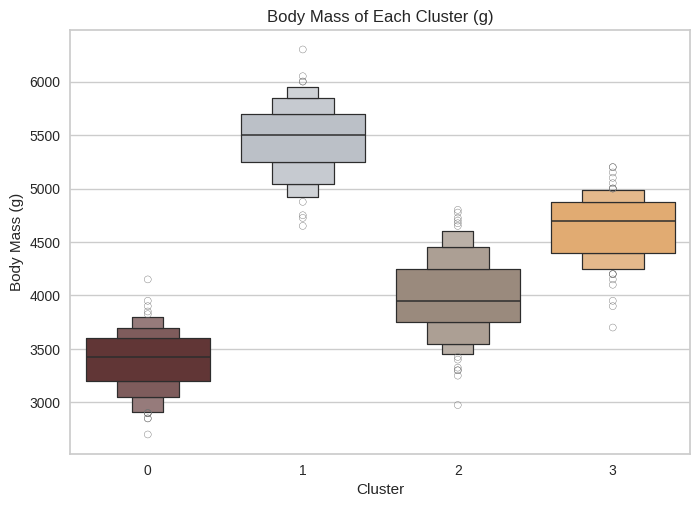

In [45]:
#Plotting the number of Life Expectancy
plt.figure()
pl=sns.boxenplot(y=df["body_mass_g"],x=df["Clusters"], palette= pal)
plt.xlabel("Cluster")
plt.ylabel("Body Mass (g)")
pl.set_title("Body Mass of Each Cluster (g)")
plt.show()

* Group 0: Mildest
* Group 1: Most severe
* Group 2: Light - Medium
* Group 3: Medium - Heavy

/tmp/ipython-input-46-1586154796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["sex"],x=df["Clusters"], palette= pal)


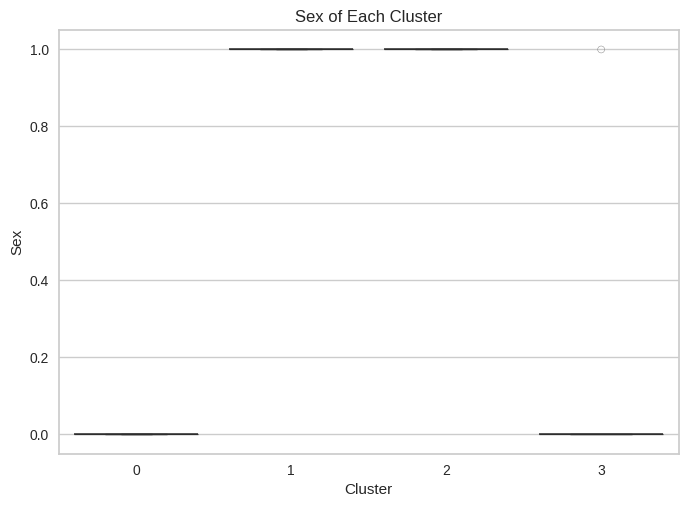

In [46]:
#Plotting the number of GDP per Capita
plt.figure()
pl=sns.boxenplot(y=df["sex"],x=df["Clusters"], palette= pal)
plt.xlabel("Cluster")
plt.ylabel("Sex")
pl.set_title("Sex of Each Cluster")
plt.show()

* Group 0: Females
* Group 1: Males
* Group 2 : Males
* Group 3: Females, but some males

In [47]:
# Lets get mean and median for each variable in the dataset
mean = df.groupby("Clusters").mean()
median = df.groupby("Clusters").median()

# Creating dataframe with means and medians
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ["Group0_mean", "Group1_mean", "Group2_mean", "Group3_mean", "Group0_median", "Group1_median", "Group2_median","Group3_median"]
df_kmeans.T

,Group0_mean,Group1_mean,Group2_mean,Group3_mean,Group0_median,Group1_median,Group2_median,Group3_median
culmen_length_mm,39.979048,49.310938,43.529398,45.781967,38.6,49.45,41.4,45.5
culmen_depth_mm,17.617143,15.667188,19.076559,14.339344,17.6,15.70,19.0,14.3
flipper_length_mm,189.028571,221.265625,234.203669,212.016393,189.0,221.00,195.0,212.0
body_mass_g,3411.904762,5450.390625,3991.165968,4641.393443,3425.0,5500.00,3950.0,4700.0
sex,0.000000,1.000000,1.000000,0.016393,0.0,1.00,1.0,0.0


#9. PROFILING

**Cluster 0**

---
- Culmen: Short-medium, moderately wide.
- Flippers: Short-medium.
- Weight: Lightest.
- Sex: Majority female.

**Cluster 1**

---
- Culmen: Short-medium, moderately wide.
- Fins: Medium-short.
- Weight: Lightest.
- Sex: Majority female.

**Cluster 2**

---
- Culmen: Medium (with long and short variations), long wide.
- Flippers: Medium-long.
- Weight: Light-medium.
- Sex: Majority male.

**Cluster 3**

---
- Culmen: Medium, short width.
- Flipper: Long.
- Weight: Medium-heavy.
- Sex: Predominantly female with some males.


# 10. Save Model


In [48]:
import pickle

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans_model, file)

In [49]:
with open('kmeans_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

test_data = pd.DataFrame({
    'culmen_length_mm': np.random.uniform(35, 50, 10),
    'culmen_depth_mm':np.random.uniform(15, 25, 10),
    'flipper_length_mm': np.random.uniform(180, 220, 10),
    'body_mass_g': np.random.uniform(3000, 5000, 10),
    'sex': np.random.choice(['MALE', 'FEMALE'], 10)
})

# hasil = saved_model.predict(test_data)
# hasil

test_data["sex"] = le.fit_transform(test_data["sex"])
new_data = test_data.copy()

test_data = scaler.fit_transform(test_data)


pca = PCA(n_components=2)
pca.fit(test_data)
PCA_ds = pd.DataFrame(pca.transform(test_data), columns=(["col1","col2"]))

new_data['Predicted Cluster'] = saved_model.predict(PCA_ds)

new_data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Predicted Cluster
0,35.308767,21.118529,204.301794,3244.076470,1,2
1,49.548648,16.394939,186.820965,3990.353820,0,0
2,47.486640,17.921446,182.602064,3068.777042,0,0
3,38.185087,18.663618,217.955421,4818.640804,0,1
4,37.727375,19.560700,218.625281,3517.559963,0,1
5,37.751068,22.851760,212.335894,4325.044569,0,1
6,39.563634,16.996738,192.184551,3623.422152,0,0
7,42.871346,20.142344,183.906885,4040.136042,0,0
8,41.479175,20.924146,207.369321,4093.420559,0,3
9,39.368437,15.464504,197.606100,3369.708911,1,2
